[Reference](https://medium.com/@basics.machinelearning/how-to-learn-algorithmic-trading-using-chatgpt-f881610fe621)

In [1]:
import pandas as pd
import datetime as dt
def download_stock_data(ticker,timestamp_start,timestamp_end):
 url=f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={timestamp_start}&period2={timestamp_end}&interval\
=1d&events=history&includeAdjustedClose=true"
 df = pd.read_csv(url)
 return df
datetime_start=dt.datetime(2022, 2, 8, 7, 35, 51)
datetime_end=dt.datetime(2023, 2, 8, 7, 35, 51)
# Convert to timestamp:
timestamp_start=int(datetime_start.timestamp()) 
timestamp_end=int(datetime_end.timestamp()) 
df = download_stock_data("AAPL",timestamp_start,timestamp_end)
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-08,171.729996,175.350006,171.429993,174.830002,173.777313,74829200
2022-02-09,176.050003,176.649994,174.899994,176.279999,175.218567,71285000
2022-02-10,174.139999,175.479996,171.550003,172.119995,171.083618,90865900
2022-02-11,172.330002,173.080002,168.039993,168.639999,167.624603,98670700
2022-02-14,167.369995,169.580002,166.559998,168.880005,167.863159,86185500


<ipython-input-2-db960189a488>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Signal"][i] = -1
<ipython-input-2-db960189a488>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Signal"][i] = 1


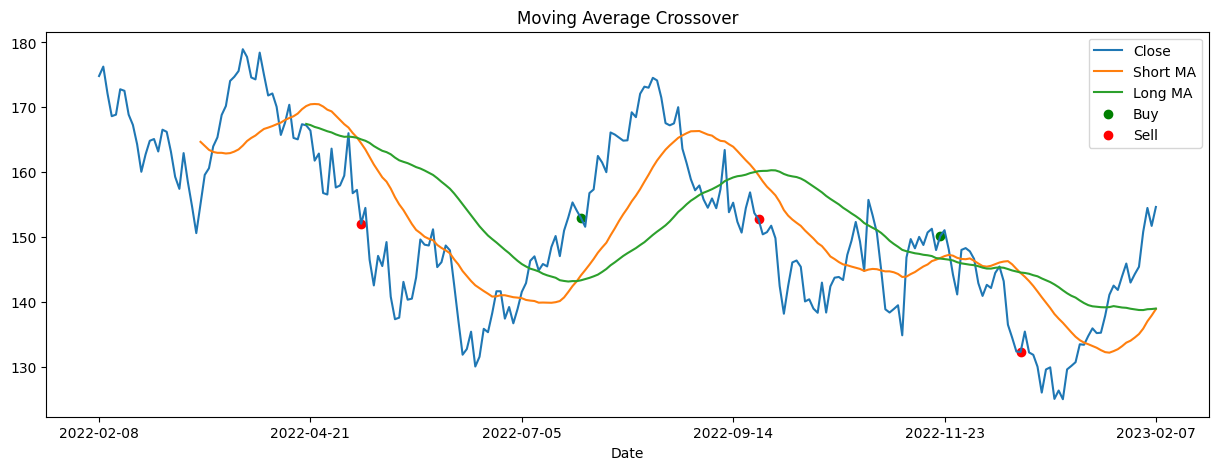

In [2]:
import pandas as pd
import numpy as np

# Load data into a pandas DataFrame
# df = pd.read_csv("data.csv")

# Calculate the short-term and long-term moving averages
short_window = 25
long_window = 50

short_ma = df["Close"].rolling(window=short_window).mean()
long_ma = df["Close"].rolling(window=long_window).mean()

# Initialize a signal column to 0
df["Signal"] = 0

# Generate signals based on the moving average crossover
for i in range(len(df)):
    if (short_ma[i] > long_ma[i]) & (short_ma[i-1] < long_ma[i-1]):
        df["Signal"][i] = 1
    elif (short_ma[i] < long_ma[i]) & (short_ma[i-1] > long_ma[i-1]):
        df["Signal"][i] = -1

# Plot the data and signals
import matplotlib.pyplot as plt
df["Close"].plot(figsize=(15,5))
plt.plot(short_ma, label="Short MA")
plt.plot(long_ma, label="Long MA")
plt.scatter(df.index, df["Close"].where(df["Signal"]==1, np.nan), color="green", label="Buy")
plt.scatter(df.index, df["Close"].where(df["Signal"]==-1, np.nan), color="red", label="Sell")
plt.legend(loc="upper right")
plt.title("Moving Average Crossover")
plt.show()

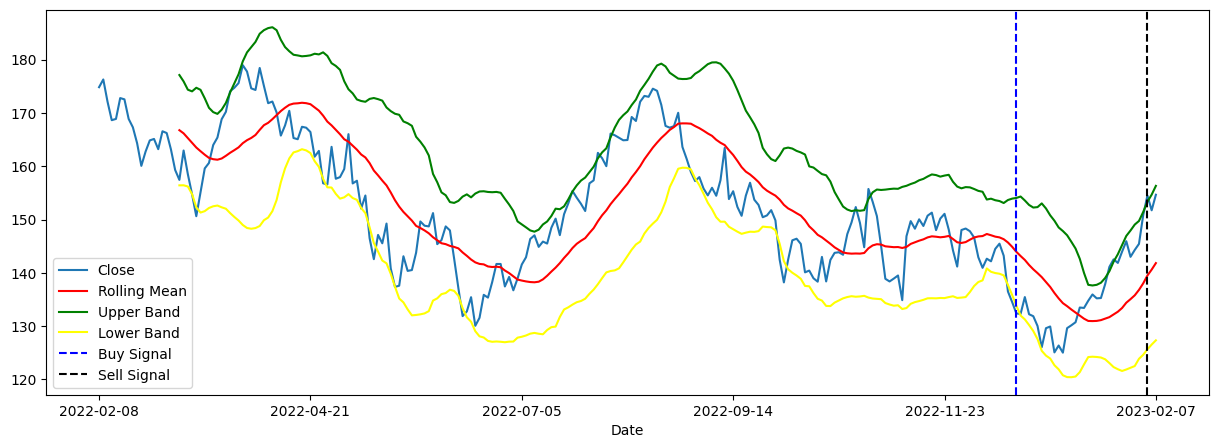

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def channel_breakout(df, window=20, n_std=2):
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * n_std)
    lower_band = rolling_mean - (rolling_std * n_std)
    
    buy_signal = None
    sell_signal = None
    hold_signal=None
    for i in range(window, len(df)):
        if df.iloc[i]['Close'] > upper_band[i]:
            sell_signal = i
        elif df.iloc[i]['Close'] < lower_band[i]:
            buy_signal = i
        else:
            hold_signal=i
    return buy_signal, sell_signal,hold_signal, rolling_mean, upper_band, lower_band

buy_signal, sell_signal,hold_signal, rolling_mean, upper_band, lower_band = channel_breakout(df)
x=df.index.values
plt.figure(figsize=(15,5))
df['Close'].plot()
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(upper_band, label='Upper Band', color='green')
plt.plot(lower_band, label='Lower Band', color='yellow')
plt.axvline(x=buy_signal, color='blue', linestyle='--', label='Buy Signal')
plt.axvline(x=sell_signal, color='black', linestyle='--', label='Sell Signal')
plt.legend()
plt.show()

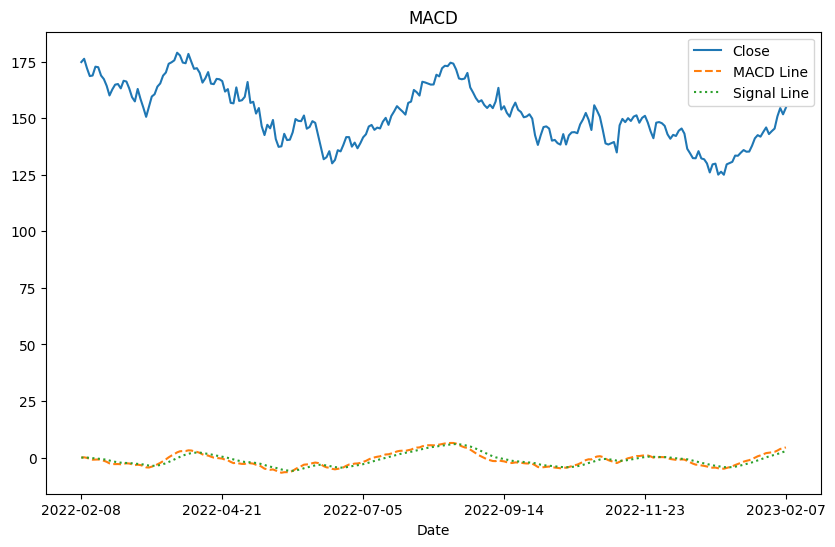

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calc_macd(prices, fast_window, slow_window, signal_window):
    fast_ewma = prices.ewm(span=fast_window, adjust=False).mean()
    slow_ewma = prices.ewm(span=slow_window, adjust=False).mean()
    macd = fast_ewma - slow_ewma
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

macd, signal = calc_macd(df['Close'], 12, 26, 9)
df['MACD_line']=macd
df['Signal_line']=signal
# df = df.set_index('Date')

df[['Close']].plot(label='Prices',figsize=(10,6))
plt.plot(macd, label='MACD Line', linestyle='--')
plt.plot(signal, label='Signal Line', linestyle=':')
plt.legend()
plt.title("MACD")
plt.show()

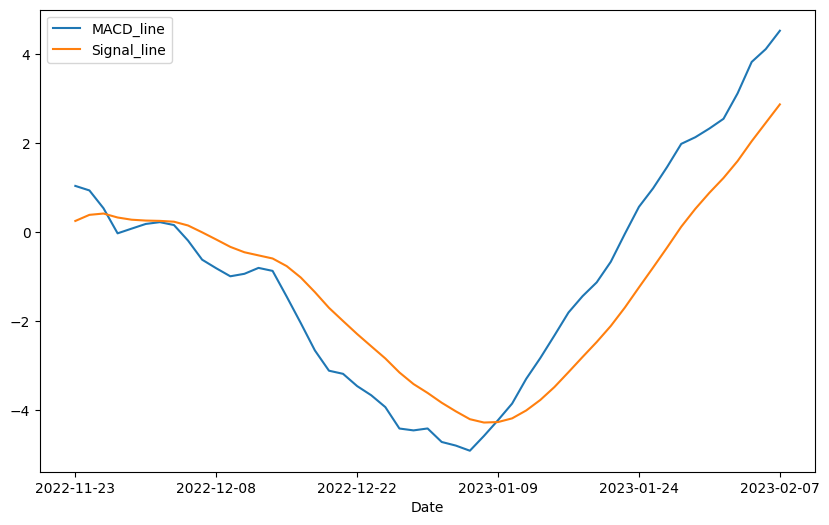

In [6]:
df.query("Date>='2022-11-23'")[['MACD_line','Signal_line']].plot(figsize=(10,6))
plt.legend()
plt.show()